# Programación aplicada a la Electrónica y a las Telecomunicaciones
## Prueba sobre Computación Numérica / Matemática
### 13 de junio de 2023

### Ejercicio 1 (4 puntos)

**Para resolver este ejercicio deberá utilizar el paquete de álgebra computacional SymPy.**

Escriba un script en Python que solicite al usuario un número entero positivo $n$ y que genere una función polinomial de grado $n$ que tenga la siguiente forma: $f(x) = c_nx^n + c_{n-1}x^{n-1} + c_{n-2}x^{n-2} + ... + c_1x + c_0$. Los coeficientes $c$ del polinomio serán números enteros aleatorios en el intervalo $[-10, 10]$. Para generar los números aleatorios deberá utilizar la función de numpy random.randint(). La expresión algebraica de la función la podrá generar como un string y luego convertir el string en una expresión de SymPy utilizando la función simpify(). Por ejemplo, para convertir la expresión algebraica $x^2 + 3x - 1/2$ a una expresión de SymPy, podría utilizar las siguientes instrucciones:

In [8]:
import sympy as sp
import numpy as np

str_expr = 'x**2 + 3**x - 1/2'
expr = sp.sympify(str_expr)
print(expr)

# Solicitar al usuario un número entero positivo
n = int(input("Ingrese un número entero positivo: "))

# Generar los coeficientes aleatorios
coeficientes = np.random.randint(-10, 11, size=n+1)

# Crear el símbolo 'x'
x = sp.symbols('x')

# Construir la expresión algebraica del polinomio
expr_algebraica = ''
for i in range(n+1):
    expr_algebraica += f'{coeficientes[i]}*x**{n-i} + '

# Eliminar el último '+'
expr_algebraica = expr_algebraica.rstrip(' + ')

# Convertir la expresión algebraica en una expresión de SymPy
expr_final = sp.sympify(expr_algebraica)

# Imprimir la expresión de SymPy
print(expr_final)

3**x + x**2 - 1/2
-2*x**6 + 6*x**5 - 6*x**4 - 3*x**3 - 3*x**2 - 4*x + 10


Una vez que haya generado la función polinomial y la haya convertido a una expresión de SymPy, deberá encontrar la ecuación de la recta tangente a la gráfica de la función cuando $x = 2$. Para obtener la pendiente de la recta tangente, deberá encontrar la derivada de la función polinomial usando SymPy. Para generar la ecuación de la recta tangente, podrá utilizar la forma punto-pendiente: $y = m(x - x_1) + y_1$, donde $x_1 = 2$, $y_1 = f(2)$, y $m$ es la pendiente de la tangente. Una vez que haya determinado la ecuación de la recta tangente y que la haya convertido a una expresión de SymPy, deberá graficar, usando matplotlib, tanto la función polinomial, como la recta tangente en el mismo plot usando colores diferentes para las líneas. Su plot deberá incluir una leyenda adecuada.

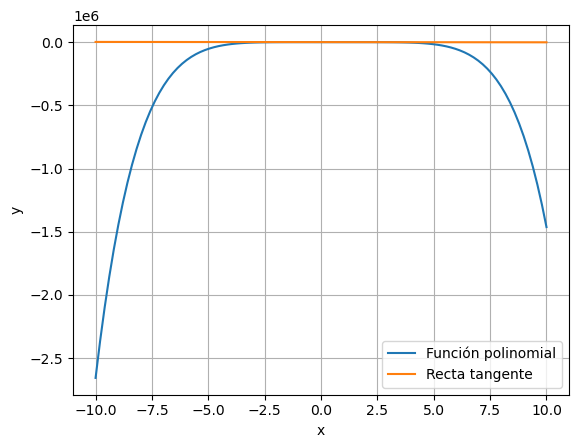

In [9]:
import matplotlib.pyplot as plt

expr_derivada = sp.diff(expr_final, x)

# Calcular el valor de la función polinomial en x=2
y1 = expr_final.subs(x, 2)

# Calcular el valor de la derivada en x=2
m = expr_derivada.subs(x, 2)

# Crear la ecuación de la recta tangente utilizando la forma punto-pendiente
x1 = 2
y = m * (x - x1) + y1

# Convertir la ecuación de la recta tangente a una expresión de SymPy
expr_tangente = sp.sympify(y)

# Graficar la función polinomial y la recta tangente
x_vals = np.linspace(-10, 10, 100)
y_vals_polinomial = [expr_final.subs(x, val) for val in x_vals]
y_vals_tangente = [expr_tangente.subs(x, val) for val in x_vals]

plt.plot(x_vals, y_vals_polinomial, label='Función polinomial')
plt.plot(x_vals, y_vals_tangente, label='Recta tangente')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 2 (6 puntos)

**Para este ejercicio deberá cargar los datos contenidos en el archivo 'censo.csv' (información demográfica de EEUU) en un dataframe de Pandas. Resuelva cada tarea que se plantea a continuación mediante un script de Python.**


#### Tarea 2.1 (1 punto)
Solicitar al usuario que ingrese el nombre de un estado y mostrar su población total.

In [2]:
def obtener_poblacion_total(df, estado):
    estado_filtrado = df[df['Estado'] == estado]
    poblacion_total = estado_filtrado['Poblacion'].sum()
    return poblacion_total


df = pd.read_csv('censo.csv')
estado = input("\nIngrese el nombre de un estado: ")
print(f"La población total de {estado} es: {obtener_poblacion_total(df, estado)}")

La población total de Alabama es: 4708708


#### Tarea 2.2 (1 punto)
Mostrar un gráfico de barras verticales indicando la población de los 10 estados con mayor número de habitantes.

Matplotlib is building the font cache; this may take a moment.


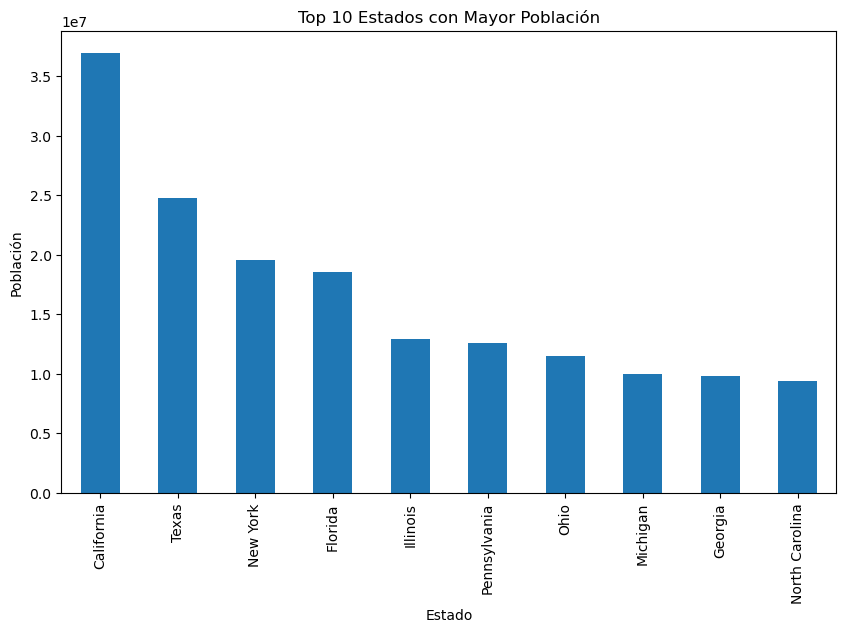

In [3]:
def crear_grafica_mayor_num_habitantes(df, num_estados):
    top_10_estados = df.groupby('Estado')['Poblacion'].sum().nlargest(num_estados)
    plt.figure(figsize=(10, 6))
    top_10_estados.plot(kind='bar')
    plt.title('Top 10 Estados con Mayor Población')
    plt.xlabel('Estado')
    plt.ylabel('Población')
    plt.show()
    

crear_grafica_mayor_num_habitantes(df, 10)

#### Tarea 2.3 (1 punto)
¿Cuál es el estado con un mayor porcentaje promedio de habitantes latinoamericanos? (calcular el promedio de todos los condados de cada estado). El script deberá mostrar el nombre del estado individual y el porcentaje promedio de habitantes latinoamericanos.

In [14]:

def obtener_porcentaje_habitantes(df):
    promedio_condado = df.groupby(['Estado', 'Condado'])['Latinoamericano'].mean().reset_index()
    promedio_estado = promedio_condado.groupby('Estado')['Latinoamericano'].mean().reset_index()
    estado_maximo = promedio_estado.loc[promedio_estado['Latinoamericano'].idxmax()]
    return estado_maximo['Estado'], estado_maximo['Latinoamericano']


estado, porcentaje = obtener_porcentaje_habitantes(df)
print(f"El estado con el mayor porcentaje promedio de habitantes latinoamericanos es: {estado}")
print(f"Porcentaje promedio de habitantes latinoamericanos: {porcentaje:.2%}")

El estado con el mayor porcentaje promedio de habitantes latinoamericanos es: New Mexico
Porcentaje promedio de habitantes latinoamericanos: 4530.61%


#### Tarea 2.4 (1 punto)
¿Existe una correlación entre el porcentaje de habitantes latinoamericanos y el número de habitantes que no hablan inglés? Para fundamentar su respuesta, utilice un gráfico de dispersión.

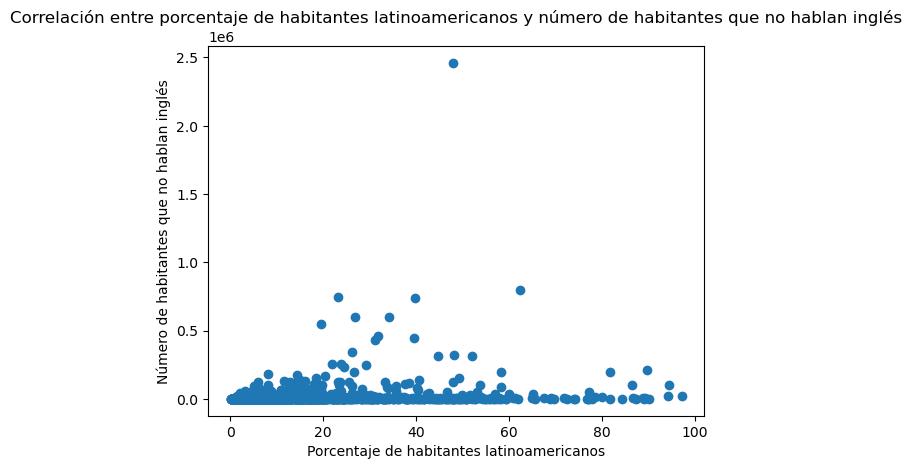

In [15]:
def generar_grafico_dispersion(df):
    plt.scatter(df['Latinoamericano'], df['No_ingles'])
    plt.title('Correlación entre porcentaje de habitantes latinoamericanos y número de habitantes que no hablan inglés')
    plt.xlabel('Porcentaje de habitantes latinoamericanos')
    plt.ylabel('Número de habitantes que no hablan inglés')
    plt.show()
    
    
generar_grafico_dispersion(df)

#### Tarea 2.5 (1 punto)
Se considera como personas 'dependientes' a aquellas que son menores a 18 años o mayores a 65 años, y como 'independientes' al resto de la población. Calcule la razón '%dependientes / %independientes' y muestre, en un gráfico de barras horizontales, el promedio de este valor para cada estado.

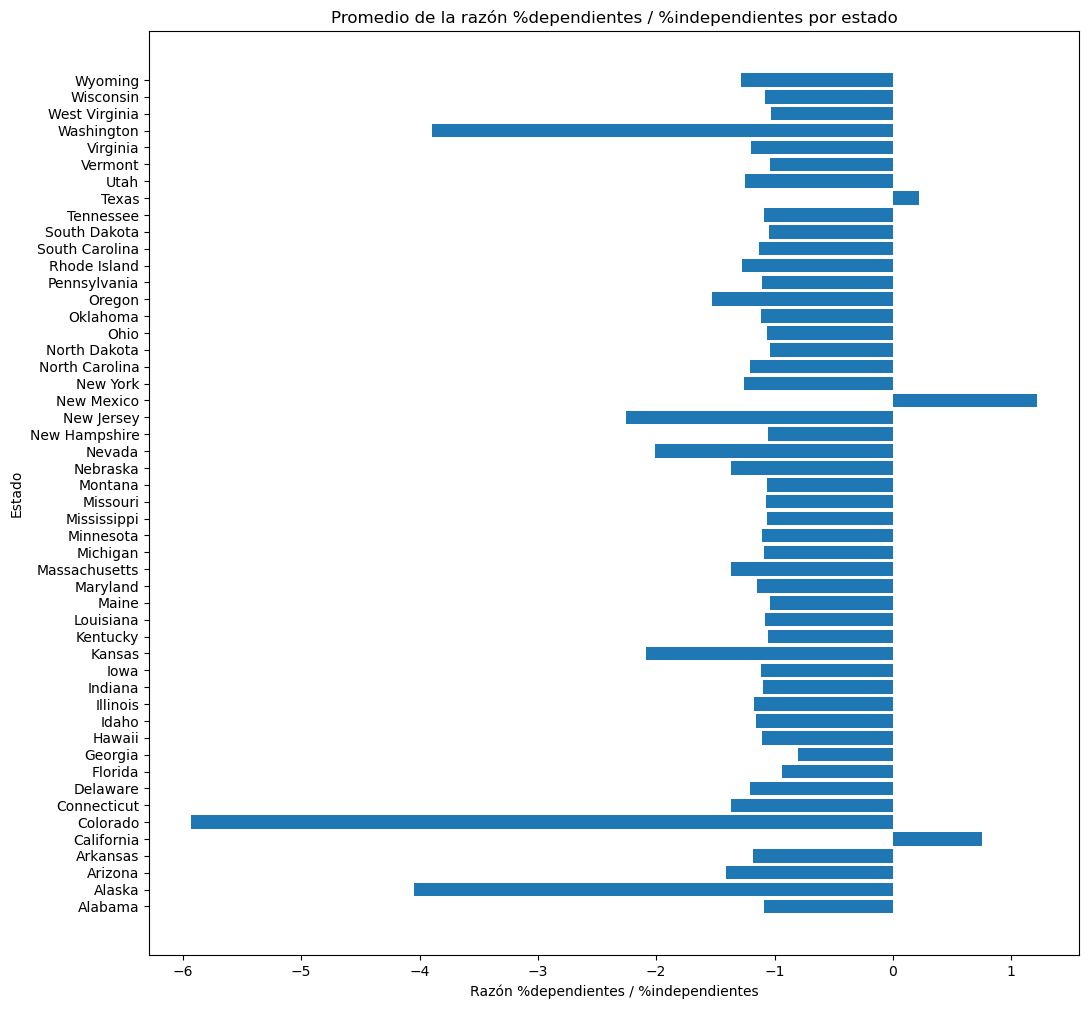

In [21]:
def generar_grafico_barras_horizontales(df):
    df['Dependientes'] = df['menor_18'] + df['mayor_65']
    df['Porcentaje_Dependientes'] = (df['Dependientes'] / df['Latinoamericano']) * 100
    df['Independientes'] = df['Latinoamericano'] - df['Dependientes']
    df['Porcentaje_Independientes'] = (df['Independientes'] / df['Latinoamericano']) * 100
    df['Razon_Dependientes_Independientes'] = df['Porcentaje_Dependientes'] / df['Porcentaje_Independientes']
    
    promedio_razon_por_estado = df.groupby('Estado')['Razon_Dependientes_Independientes'].mean().reset_index()
    
    plt.figure(figsize=(12, 12))
    plt.barh(promedio_razon_por_estado['Estado'], promedio_razon_por_estado['Razon_Dependientes_Independientes'])
    plt.title('Promedio de la razón %dependientes / %independientes por estado')
    plt.xlabel('Razón %dependientes / %independientes')
    plt.ylabel('Estado')

    plt.show()
    

generar_grafico_barras_horizontales(df)

### Tarea 2.6 (1 punto)
Determine los 10 estados con menores ingresos anuales promedio y los 10 estados con mayor índice de analfabetismo infantil. Ordene ambas listas de estados alfabéticamente.

In [23]:
def obtener_estados_ingresos_promedio(df):
    promedio_ingresos_por_estado = df.groupby('Estado')['Ingresos_anuales'].mean().reset_index()
    estados_menores_ingresos = promedio_ingresos_por_estado.sort_values('Ingresos_anuales').head(10).sort_values('Estado')
    return estados_menores_ingresos


def obtener_estados_mayor_indx_analfabetismo_infantil(df):
    indice_analfabetismo_por_estado = df.groupby('Estado')['Analfabetismo_infantil'].sum().reset_index()
    estados_mayor_analfabetismo = indice_analfabetismo_por_estado.sort_values('Analfabetismo_infantil', ascending=False).head(10).sort_values('Estado')
    return estados_mayor_analfabetismo


print(f"10 estados con menores ingresos anuales promedio: \n{obtener_estados_ingresos_promedio(df)}")
print(f"\n10 estados con mayor índice de analfabetismo infantil: \n{obtener_estados_mayor_indx_analfabetismo_infantil(df)}")

10 estados con menores ingresos anuales promedio: 
           Estado  Ingresos_anuales
0         Alabama      37179.388060
3        Arkansas      34993.573333
16       Kentucky      37310.908333
17      Louisiana      39250.046875
23    Mississippi      34146.609756
24       Missouri      39370.495652
30     New Mexico      38731.181818
35       Oklahoma      39340.870130
41      Tennessee      38997.210526
47  West Virginia      35928.000000

10 estados con mayor índice de analfabetismo infantil: 
            Estado  Analfabetismo_infantil
0          Alabama                  1212.8
3         Arkansas                  1193.3
9          Georgia                  3110.6
16        Kentucky                  1763.1
17       Louisiana                  1193.8
23     Mississippi                  1547.4
32  North Carolina                  1531.2
41       Tennessee                  1450.7
42           Texas                  4806.4
45        Virginia                  1838.9
